In [1]:
import datetime
from datetime import date

import numpy as np
import pandas as pd
import pandas_datareader.data as web

'''pandas_datareader.data module is a part of the pandas_datareader library,
     which is used for retrieving financial and economic data from various online sources.
'''
import seaborn as sns
from matplotlib import pyplot as plt


import yfinance as yfin
yfin.pdr_override()

from scipy import stats
#'''overrides all the other data sources no need to specify the source'''

## Pulling Data

In [2]:
start= datetime.date.today()-datetime.timedelta(days=5*365)
end=datetime.date.today()

#timedelta is used to specify the duration of time

In [3]:
df= web.DataReader(["TCS.NS","LT.NS","ICICIBANK.NS"],start,end)["Adj Close"]
df

[*********************100%***********************]  3 of 3 completed


,ICICIBANK.NS,LT.NS,TCS.NS
Date,,,
2018-07-09,263.354279,1175.618042,1691.245361
2018-07-10,265.490631,1172.514648,1684.149902
2018-07-11,260.975189,1163.524170,1778.277588
2018-07-12,264.422485,1186.342651,1770.598511
2018-07-13,260.004120,1185.110718,1779.355591
...,...,...,...
2023-06-30,934.599976,2475.550049,3302.250000
2023-07-03,942.549988,2454.050049,3272.300049
2023-07-04,944.700012,2461.850098,3308.850098


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2018-07-09 to 2023-07-06
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ICICIBANK.NS  1233 non-null   float64
 1   LT.NS         1233 non-null   float64
 2   TCS.NS        1233 non-null   float64
dtypes: float64(3)
memory usage: 38.5 KB


In [5]:
df.describe()

,ICICIBANK.NS,LT.NS,TCS.NS
count,1233.000000,1233.000000,1233.000000
mean,581.263832,1475.315412,2620.762617
std,208.064456,412.766607,678.213133
min,251.750000,672.131836,1538.804932
25%,382.887268,1216.720337,1931.388794
50%,539.126648,1370.195557,2834.484619
75%,749.253723,1787.449951,3219.754150
max,959.400024,2488.600098,3857.104004


## Price Chart & Return Calculation

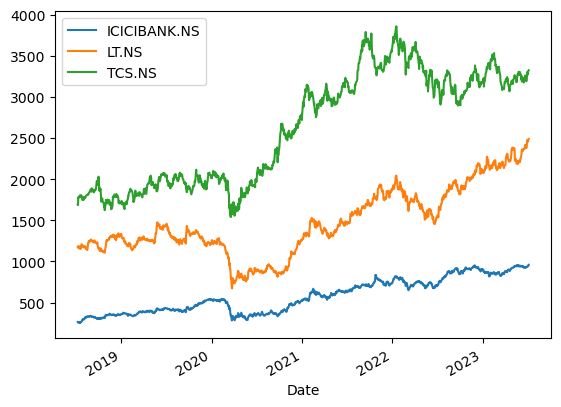

In [6]:
df.plot();

In [7]:
##Return Calculation

df["ICICIBANK"]=np.log(df["ICICIBANK.NS"])-np.log(df["ICICIBANK.NS"].shift(1))
df["LT"]=np.log(df["LT.NS"])-np.log(df["LT.NS"].shift(1))
df["TCS"]=np.log(df["TCS.NS"])-np.log(df["TCS.NS"].shift(1))


#.shift()  gives the value at the previous day

#Advantage of log return is that they are additive in nature

In [8]:
ret= df.iloc[1:,3:]

#removing the first row because the return can;t be calculated for this and keeping only return columns

In [9]:
ret.describe()

,ICICIBANK,LT,TCS
count,1232.000000,1232.000000,1232.000000
mean,0.001049,0.000609,0.000548
std,0.021529,0.017966,0.016007
min,-0.196597,-0.177522,-0.098830
25%,-0.009544,-0.008578,-0.007380
50%,0.000846,0.000278,0.000688
75%,0.011243,0.009340,0.008886
max,0.128942,0.090162,0.093901


In [10]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232 entries, 2018-07-10 to 2023-07-06
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ICICIBANK  1232 non-null   float64
 1   LT         1232 non-null   float64
 2   TCS        1232 non-null   float64
dtypes: float64(3)
memory usage: 38.5 KB


In [11]:
#Calculating Annual return

((ret.mean()+1).pow(365)-1)*100

ICICIBANK    46.640601
LT           24.870905
TCS          22.144588
dtype: float64

## Volatility

In [12]:
band= df.max()-df.min()
band

ICICIBANK.NS     707.650024
LT.NS           1816.468262
TCS.NS          2318.299072
ICICIBANK          0.325539
LT                 0.267685
TCS                0.192731
dtype: float64

In [13]:
currYear= df.loc[date.today()-datetime.timedelta(365):date.today()]
currYear.max()-currYear.min()


# .loc label based indexing like in this case date
#.iloc integer based indexing like in previous case of log return

ICICIBANK.NS    221.826172
LT.NS           897.870972
TCS.NS          638.007080
ICICIBANK         0.081656
LT                0.099412
TCS               0.082514
dtype: float64

## Moving Avergae

<AxesSubplot:xlabel='Date', ylabel='ICICIBANK.NS'>

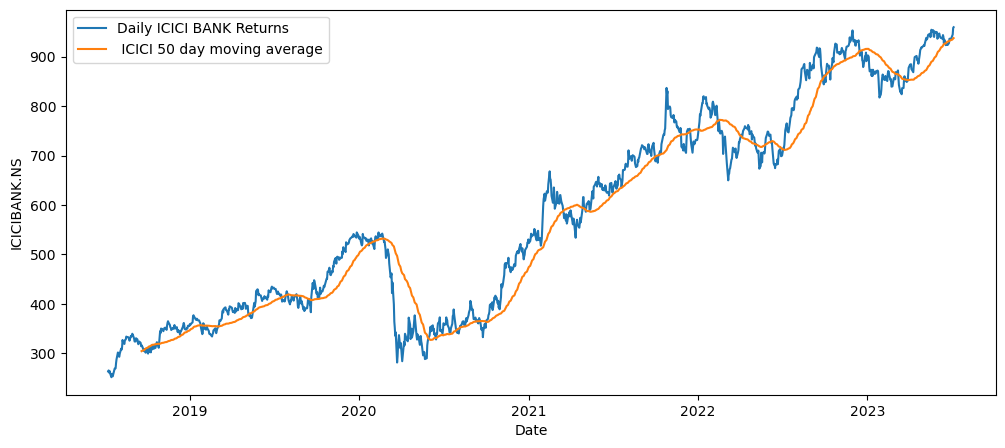

In [14]:
# 50 day moving average

df["ICICI_50_day"]=df["ICICIBANK.NS"].rolling(50).mean()

plt.figure(figsize=(12,5))

sns.lineplot(
    x="Date",y="ICICIBANK.NS", data=df, label= "Daily ICICI BANK Returns"
)

sns.lineplot(
    x="Date", y="ICICI_50_day", data= df, label=" ICICI 50 day moving average"
)

.rolling(50): Creates a rolling window of size 50. This means that for each element in the "ICICIBANK.NS" column, it considers the current value along with the preceding 49 values to calculate the rolling mean.

Creates 49 empty enteries

In [15]:
# 50 day Rolling distance
#Distance between 50 day rolling average and that they price

((abs(df.iloc[:,:3]-df.iloc[:,:3].rolling(50).mean()))/df.iloc[:,:3]).mean()

ICICIBANK.NS    0.059852
LT.NS           0.060900
TCS.NS          0.042371
dtype: float64

In [16]:
df.iloc[:,:3]

,ICICIBANK.NS,LT.NS,TCS.NS
Date,,,
2018-07-09,263.354279,1175.618042,1691.245361
2018-07-10,265.490631,1172.514648,1684.149902
2018-07-11,260.975189,1163.524170,1778.277588
2018-07-12,264.422485,1186.342651,1770.598511
2018-07-13,260.004120,1185.110718,1779.355591
...,...,...,...
2023-06-30,934.599976,2475.550049,3302.250000
2023-07-03,942.549988,2454.050049,3272.300049
2023-07-04,944.700012,2461.850098,3308.850098


## Combined Funciton for all of the above

In [17]:
def investCompare(starttime,endtime,tickers):
    
    #pull data
    prices= web.DataReader(list(tickers.keys()),starttime,endtime)["Adj Close"]
    prices=prices.rename(columns=tickers)
    
    #return
    ret= np.log(prices)-np.log(prices.shift(1))
    ret= ret.iloc[1:,:]
    
    #analysing last year data
    currYear= prices.loc[
        date.today()-datetime.timedelta(365):date.today()
    ]
    highlow= (currYear.max()-currYear.min())/prices.iloc[-1]
    highlow= pd.DataFrame(highlow,columns=["HighminusLow"])
    
    #Moving Average Volatility
    MA=pd.DataFrame(
        ((abs(prices-prices.rolling(50).mean()))/prices).mean(),
        columns=["MovingAverageVolatility"]
    )
    
    investments =pd.merge(highlow,MA,left_index=True,right_index=True)
    investments=pd.merge(
        investments,
        pd.DataFrame(100*ret.mean(),columns=["Daily Return Percentage"]),
        left_index=True,
        right_index=True   
    )
    
    return investments.round(3)
#Mean Absolute Percentage Deviation


This performs a merge operation between the investments DataFrame and the DataFrame containing the mean daily return percentages. The merge is based on the index of the DataFrames since left_index=True and right_index=True are specified.

The result of the merge operation is assigned back to the investments DataFrame, which now includes the "Daily Return Percentage" column from the merged DataFrame.

In [18]:
investCompare(
    start,
    end, 
    {"ICICIBANK.NS":"ICICIBANK","LT.NS":"LT","TCS.NS":"TCS"}
)

[*********************100%***********************]  3 of 3 completed


,HighminusLow,MovingAverageVolatility,Daily Return Percentage
ICICIBANK,0.231,0.060,0.105
LT,0.361,0.061,0.061
TCS,0.192,0.042,0.055


## Comparing and Contrasting Return on different asset class

#to use data from some other source api use web.datareader([  ],"Source(fred)",start,end)

df = web.DataReader(["sp500", "NASDAQCOM", "CBBTCUSD"], "fred", start, end)

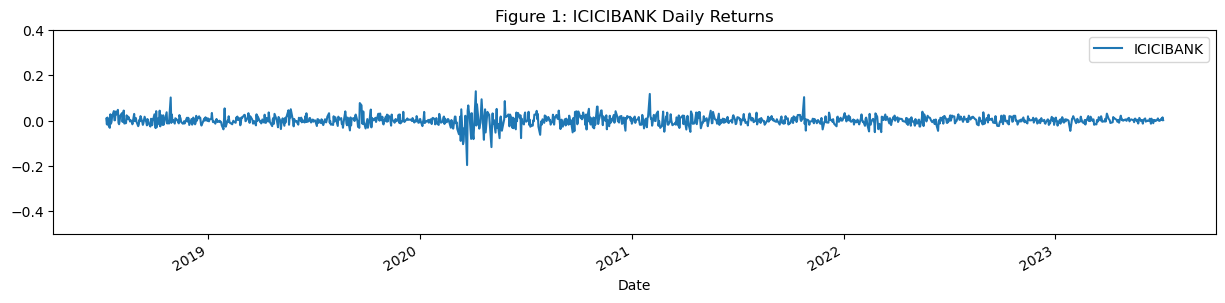

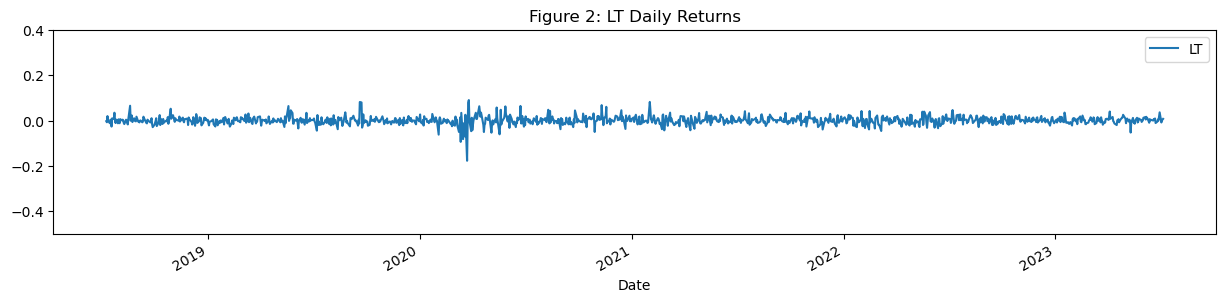

In [19]:
ax1 = ret.plot(figsize=(15, 3), y="ICICIBANK", title="Figure 1: ICICIBANK Daily Returns")
ax2 = ret.plot(figsize=(15, 3), y="LT", title="Figure 2: LT Daily Returns")

ax1.set_ylim(-0.5, 0.4)
ax2.set_ylim(-0.5, 0.4);

### Correlation

In [20]:
round(df.iloc[:,:3].corr(),3)

,ICICIBANK.NS,LT.NS,TCS.NS
ICICIBANK.NS,1.000,0.920,0.874
LT.NS,0.920,1.000,0.762
TCS.NS,0.874,0.762,1.000


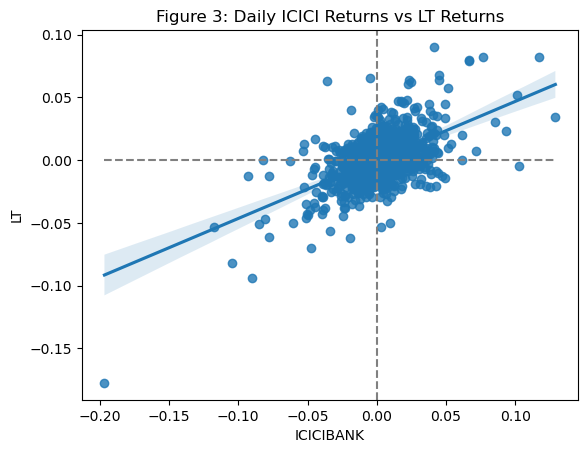

In [21]:
#sns.regplot create a scatter plot with a regression line


chart = sns.regplot(x="ICICIBANK", y="LT", data=ret).set(
    title="Figure 3: Daily ICICI Returns vs LT Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(ret.ICICIBANK), max(ret.ICICIBANK)], [0, 0], linestyle="--", color="grey");

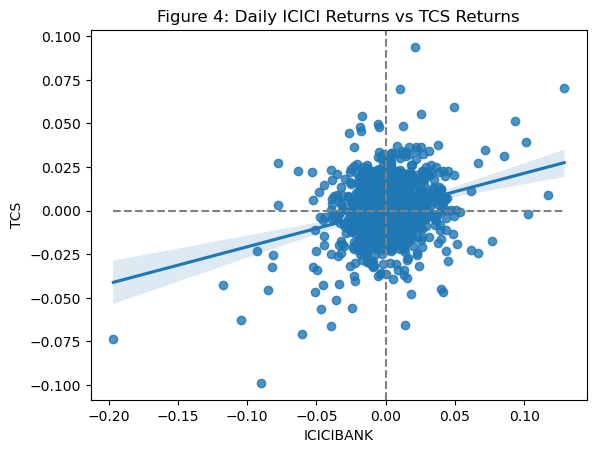

In [22]:
chart = sns.regplot(x="ICICIBANK", y="TCS", data=ret).set(
    title="Figure 4: Daily ICICI Returns vs TCS Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(ret.ICICIBANK), max(ret.ICICIBANK)], [0, 0], linestyle="--", color="grey");

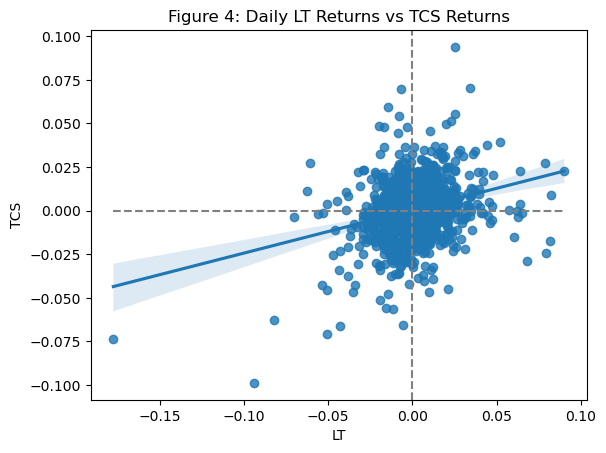

In [23]:
chart = sns.regplot(x="LT", y="TCS", data=ret).set(
    title="Figure 4: Daily LT Returns vs TCS Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(ret.LT), max(ret.LT)], [0, 0], linestyle="--", color="grey");

The Scattering in the above graph shows the degree of correlation

### Sharpe Ratio

In [24]:
Sharpe_Ratio= ret.mean()/ret.std()
Sharpe_Ratio

ICICIBANK    0.048742
LT           0.033881
TCS          0.034246
dtype: float64

Sharpe Ratio utilises the standard deviation as the measure of risk.

Standard Deviation considers both the upside and the downside risk of investment but unless if the instrument is short no one really bother sabout the upside risk.

Because of this their is not much point in penalising the sharpe ratio of upside risk.

**Semivariance** takes into consideration only the downside risk.

Semivariance of variance of return that are less than the average.

Thus semivariance uses either the positive or negative return based on whethe r the instrument is long or short.

In [25]:
retmean= ret.mean()
ret_semivariance= ((ret[ret<retmean]-retmean)**2).mean()
ret_semivariance

ICICIBANK    0.000477
LT           0.000318
TCS          0.000268
dtype: float64

In [26]:
ret.std()

ICICIBANK    0.021529
LT           0.017966
TCS          0.016007
dtype: float64

## Statistical Distribution

**Symmetric Nature**
determine data points on either side of the mean

In [27]:
(len(df[df["LT.NS"] > df["LT.NS"].mean()])) / (len(df))

0.41849148418491483

42% data point greater than the mean slightly positive skew

**Constant Volatility Check**
ploting rolling average of the standard deviation

<Figure size 1200x500 with 0 Axes>

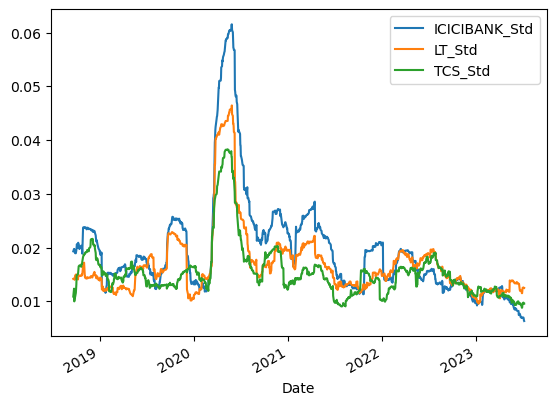

In [28]:
vols=pd.DataFrame(ret.rolling(50).std()).rename(columns={"ICICIBANK":"ICICIBANK_Std","LT":"LT_Std","TCS":"TCS_Std"})

plt.figure(figsize=(12,5))
vols.plot();

Volatility is not constant in any of the above case.

**Normal Distribution Check**

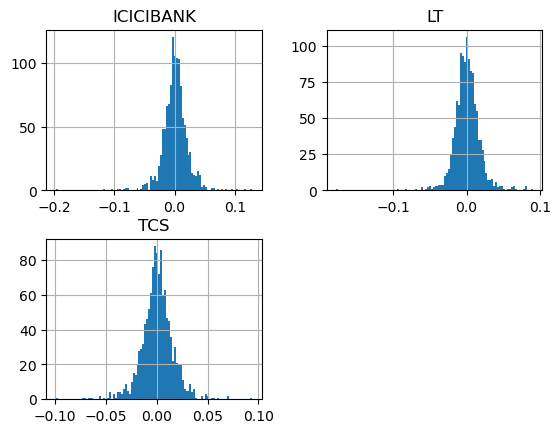

In [29]:
#Histogram- increasing the number of bins increases the noise
ret.iloc[:,:3].hist(bins=100);

In [51]:
#Noramlity test
statistics,pvalue=stats.normaltest((np.array(ret)))
statistics,pvalue

for col,stat,pval in zip(ret.columns,statistics,pvalue):
    print(f"{col} test  statistics is {stat:.3f} and the pvalue is {pval:} ")


ICICIBANK test  statistics is 279.577 and the pvalue is 1.9525661027330245e-61 
LT test  statistics is 283.207 and the pvalue is 3.1802413244462053e-62 
TCS test  statistics is 134.691 and the pvalue is 5.651526898676674e-30 


Normal Test- This method uses D'Agostino and Pearson's normality test, which combines skew and kurtosis to produce an omnibus test of normality.
The null hypothesis of this test is that the sample data fits a normal distribution. 

**Skewness and Kurtosis** 

Jarques-Bera Test
The test statistic will always be greater than zero. In the context of the Jarque-Bera test, the null hypothesis assumes that the data follows a normal distribution. A low p-value suggests that there is strong evidence to reject the null hypothesis, indicating that the data is not normally distributed.



In [55]:
for col in ret.columns:
    skew=stats.jarque_bera((np.array(ret[col]))).pvalue
    print(f"The p value for {col} in Jarques-Bera test is {skew}")

The p value for ICICIBANK in Jarques-Bera test is 0.0
The p value for LT in Jarques-Bera test is 0.0
The p value for TCS in Jarques-Bera test is 0.0


Even though the histogram suggested that the data distribution might be normal the pvalue suggest against it.

This could primarly be due to the Fat tails implying that the Extreme events are very likely.

## Failure point of Gauss Distribution

In [60]:
for col in ret.columns:
    retMax=ret[col].max()
    retMin=ret[col].min()
    print(
        f"Min return of {col} is %.4f and the maximum return of sample data is %.4f"
        %(retMax,retMin)
    )
        

Min return of ICICIBANK is 0.1289 and the maximum return of sample data is -0.1966
Min return of LT is 0.0902 and the maximum return of sample data is -0.1775
Min return of TCS is 0.0939 and the maximum return of sample data is -0.0988


**Z-score Calculation**

In [35]:
Z_min=(ret.min()-ret.mean())/ret.std()
Z_min

ICICIBANK   -9.180555
LT          -9.914889
TCS         -6.208238
dtype: float64

In [36]:
Z_max=(ret.max()-ret.mean())/ret.std()
Z_max

ICICIBANK    5.940537
LT           4.984619
TCS          5.831828
dtype: float64

The standard deviation from the mean are huge in above cases

In [37]:
stats.norm.cdf(Z_min)

array([2.14437832e-20, 1.79327956e-23, 2.67910434e-10])

In [38]:
ret.min()

ICICIBANK   -0.196597
LT          -0.177522
TCS         -0.098830
dtype: float64

The chance that we could have a -19% return is 2.144e-20

Determining Cutoff value at -3 to +3 standard deviations from the mean

mean+-3sigma

In [39]:
upper_deviation=3*ret.std()+ret.mean()
upper_deviation

ICICIBANK    0.065636
LT           0.054507
TCS          0.048571
dtype: float64

In [40]:
lower_deviation=(-3*ret.std())+ret.mean()
lower_deviation

ICICIBANK   -0.063537
LT          -0.053289
TCS         -0.047474
dtype: float64

In [41]:
ret[(ret["ICICIBANK"]>upper_deviation["ICICIBANK"])|
    (ret["ICICIBANK"]<lower_deviation["ICICIBANK"])]["ICICIBANK"].tail()

Date
2020-05-18   -0.077953
2020-05-27    0.085572
2020-06-24   -0.077498
2021-02-01    0.117245
2021-10-25    0.103027
Name: ICICIBANK, dtype: float64

In [42]:
len(ret[(ret["ICICIBANK"]>0.05)|(ret["ICICIBANK"]<-0.05)])

33

33 values are outside the +/-5% standard deviation range. Thus possibility of happening of this events is almost negligible expect one of those event in the past 5 years.  

## Non-Gaussian Distribution

Using Student's t-distribution instead of normal distribution as they have heavier tails

Since we have 1233 data points we have 1232 degreee of freedoms

In [43]:
np.random.seed(555)
stats.t.rvs(df=1232,size=5000)

array([ 0.14721743,  1.18713857,  0.3369345 , ...,  0.66835254,
        0.70220892, -0.31549075])

(array([0.00205393, 0.00273857, 0.00273857, 0.00342321, 0.00890035,
        0.0130082 , 0.0212239 , 0.0212239 , 0.03286282, 0.04929423,
        0.06367171, 0.08694954, 0.09311131, 0.12665877, 0.15883695,
        0.19033048, 0.22593187, 0.25879468, 0.29302678, 0.35122136,
        0.35601385, 0.39229988, 0.38750738, 0.39366916, 0.35053671,
        0.38956131, 0.37244526, 0.34437493, 0.32657424, 0.2574254 ,
        0.26084861, 0.23688614, 0.18074549, 0.13418984, 0.13898233,
        0.08626489, 0.06983349, 0.04176316, 0.04587102, 0.0260164 ,
        0.01232356, 0.01506212, 0.00890035, 0.00547714, 0.00273857,
        0.00136928, 0.00068464, 0.00068464, 0.00068464, 0.00068464]),
 array([-3.4643912 , -3.31832946, -3.17226773, -3.02620599, -2.88014426,
        -2.73408253, -2.58802079, -2.44195906, -2.29589733, -2.14983559,
        -2.00377386, -1.85771213, -1.71165039, -1.56558866, -1.41952692,
        -1.27346519, -1.12740346, -0.98134172, -0.83527999, -0.68921826,
        -0.54315652, -0.39

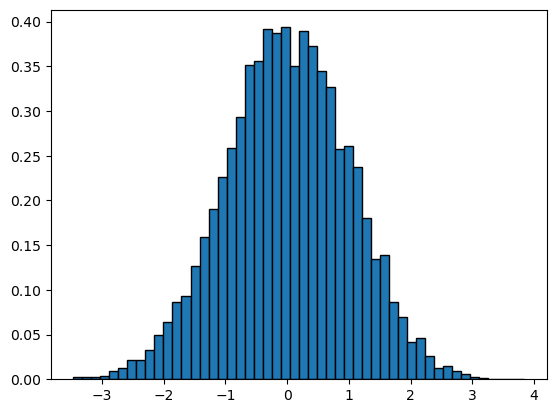

In [44]:
# generate t distribution with sample size 10000
x = stats.t.rvs(df=1232, size=10000)

# create plot of t distribution
plt.hist(x, density=True, edgecolor="black", bins=50)

Using ttest_ind method to determine the probability that our returns came from the same sample distribution

In [45]:
t_stat,p=stats.ttest_ind(ret,stats.t.rvs(df=1232,size=1233))
t_stat,p

(array([0.30021907, 0.28461162, 0.28247488]),
 array([0.76403539, 0.77596564, 0.77760314]))

If the p value is below 95% we would reject the null hypothesis that these values came from the same data as the sample

Every time we run the sample data cell we get different sample which means different p value